#### [Blend of submissions - semi-final.1](https://www.kaggle.com/code/nina2025/blend-of-submissions-semi-final-1/)

&nbsp;

**algorithm.1** - assign pseudo-probabilities to each element of each row

**algorithm.2** - simple calculation - which element is more in the column - that one is selected, if there is a collision - their number is equal - the algorithm.1 is called

**algorithm.3** - an attempt will be made to cyclically call both algorithms until the moment of stopping. The moment of stopping is 0 or a slight difference in the resulting output files. Cycle will be used to assign different pseudo-probabilities several times. From the obtained experimental values it is clear that this takes place. Since the operations are performed quickly, an attempt will also be made to collect a larger number of submission files into the system.

&nbsp;

In the last work of this series - [**Blend of submissions - final**](https://www.kaggle.com/code/nina2025/blend-of-submissions-final/edit)
the **algorithm.3** mechanism will be used, the stopping point will be the execution of predefined actions (start as in Part.10), intelligent search will not be used yet. Attached to this work is a description of the algorithm in the form of screenshots + 2 submission comparison mechanisms: one is a matrix of each-to-each differences of the target, and the second is 3 matrices each-to-each, where the target is divided into three parts, as in the task requirement (map@3). Also attached is a general list of all submissions involved in this series of works (out of 13 datasets related to this competition).

public solutions:

&nbsp;

- #### LB=0.38285 - v7 - [Hill climbing](https://www.kaggle.com/code/palfig/hill-climbing/notebook?scriptVersionId=247143022) by [Palfi G](https://www.kaggle.com/palfig)
- #### LB=0.38213 - v01 - [Blending Submissions: A Cluster-Averaging Approach](https://www.kaggle.com/code/hbugrae/blending-submissions-a-cluster-averaging-approach) by [H. Buğra Eken](https://www.kaggle.com/hbugrae)
- #### LB=0.38000 - v02 - [Predicting Fertilizer Name( Stacking Ensemble)](https://www.kaggle.com/code/ayushchandramaurya/predicting-fertilizer-name-stacking-ensemble/output) by [Ayush chandra Maurya](https://www.kaggle.com/hoon0303https://www.kaggle.com/ayushchandramaurya)
- #### LB=0.37971 - v02 - [Predicting Optimal Fertilizers( Stacking )](https://www.kaggle.com/code/hoon0303/predicting-optimal-fertilizers-stacking) by [hoon0303](https://www.kaggle.com/hoon0303)
- #### LB=0.37758 - v14 - [S05E06 | Fertilizer Optimization | Ensemble](https://www.kaggle.com/code/ravaghi/s05e06-fertilizer-optimization-ensemble/notebook) by [Mahdi Ravaghi](https://www.kaggle.com/ravaghi)
- #### LB=0.38216 - v01 - [20250624_PG6_RWA](https://www.kaggle.com/code/elainedazzio/20250624-pg6-rwa/notebook) by [L. Elaine Dazzio](https://www.kaggle.com/elainedazzio)
- #### LB=0.38215 - v12 - [Blend of submissions - part 4,7,9](https://www.kaggle.com/code/nina2025/ensemble-of-top-4-public-solutions-part-4-7-9) by [Lion-li-li](https://www.kaggle.com/code/nina2025)
- #### LB=0.38192 - v05 - [Blend of submissions - part 3,5,8](https://www.kaggle.com/code/nina2025/ensemble-of-top-4-public-solutions-part-3-5-8-10) by [Lion-li-li](https://www.kaggle.com/code/nina2025)

&nbsp;

Step 1: &nbsp; 3 groups of 5 submissions (3.Top participate in each group) from the public solutions described above go through 13 different pseudo-probability schemes in turn, namely:

- Топ.3 + [0.38000, 0.37971] -> [schems] -> 13.submissions -> Groupe.1 -> &nbsp;'..GEN_25.2a'
- Топ.3 + [0.37758, 0.37971] -> [schems] -> 13.submissions -> Groupe.2 -> &nbsp;'..GEN_25.2b'
- Топ.3 + [0.37758, 0.38000] -> [schems] -> 13.submissions -> Groupe.3 -> &nbsp;'..GEN_25.2c'

Step 2: &nbsp; Each group goes through the 'same old' algorithm. 1: &nbsp; each element of the row is manually assigned a pseudo-probability, then all the obtained results are added to one row, the row is sorted in descending order and by the key of the accumulated pseudo-weight, the first three are issued as specified by the task

output: '..GEN_27.4a', '..GEN_27.4b', '..GEN_27.4c',  

In [1]:
ls -l /kaggle/input/27-june-2025-fertilizer | grep 38_285


-rw-r--r-- 1 nobody nogroup 7031849 Jun 28 13:29 submission__LB__0_38_285.csv


In [2]:
import pandas as pd
from collections import Counter
from functools import reduce

# Define file paths
model_files = {
    'M1': 'submission__LB__0_38_285.csv',
    'M2': 'submission__LB__0_38_213.csv',
    'M3': 'submission__LB__0_38_192.csv',
    'M4': 'submission__LB__0_38_000.csv',
    'M5': 'submission__LB__0_37_971.csv',
    'G1': 'submission__LB__0_GEN_27.4a.csv',
    'G2': 'submission__LB__0_GEN_27.4b.csv',
    'G3': 'submission__LB__0_GEN_27.4c.csv'
}

path = '/kaggle/input/27-june-2025-fertilizer/'

# Load predictions and rename columns
dfs = []
for name, file in model_files.items():
    df = pd.read_csv(path + file)
    df = df.rename(columns={'Fertilizer Name': name})
    dfs.append(df)

# Merge all predictions on 'id'
df_merged = reduce(lambda left, right: pd.merge(left, right, on='id'), dfs)

# Define ensembling strategies
def get_top3(row, method='vote', weights=None):
    preds = [row[col] for col in model_files]
    if method == 'vote':
        return ' '.join([x for x, _ in Counter(preds).most_common(3)])
    elif method == 'weighted':
        score_map = {}
        for name in model_files:
            label = row[name]
            score_map[label] = score_map.get(label, 0) + weights.get(name, 1.0)
        sorted_preds = sorted(score_map.items(), key=lambda x: -x[1])
        return ' '.join([label for label, _ in sorted_preds[:3]])
    elif method == 'consensus_fill':
        counts = Counter(preds)
        common = [x for x, c in counts.items() if c > 1]
        rest = [x for x in preds if x not in common]
        return ' '.join(dict.fromkeys(common + rest))[:3]
    elif method == 'stacked':
        return ' '.join(dict.fromkeys(preds))[:3]
    elif method == 'diverse':
        return ' '.join(dict.fromkeys(preds[::-1]))[:3]
    else:
        raise ValueError("Unknown method")

# Define ensemble weights
weights = {
    'M1': 0.92, 'M2': 0.90, 'M3': 0.89, 'M4': 0.88, 'M5': 0.87,
    'G1': 0.80, 'G2': 0.78, 'G3': 0.76
}

# Create ensemble submissions
methods = ['vote', 'weighted', 'consensus_fill', 'stacked', 'diverse']
for method in methods:
    df_merged['Fertilizer Name'] = df_merged.apply(get_top3, axis=1, method=method, weights=weights)
    df_merged[['id', 'Fertilizer Name']].to_csv(f'ensemble_{method}.csv', index=False)


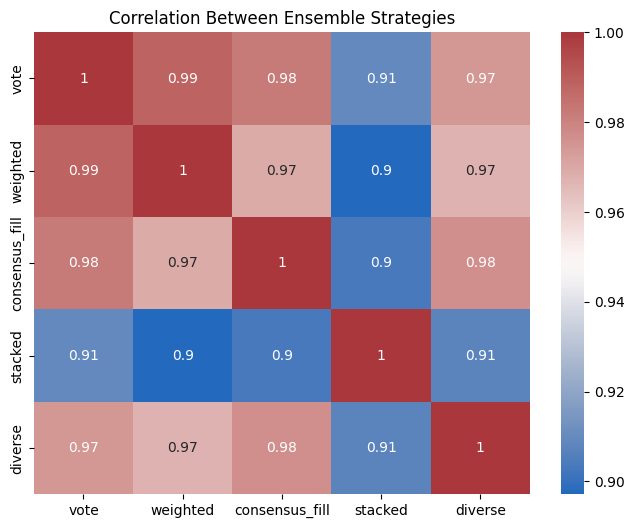

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


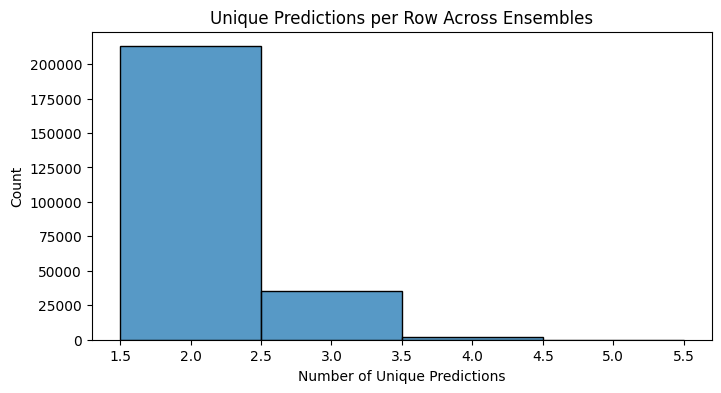

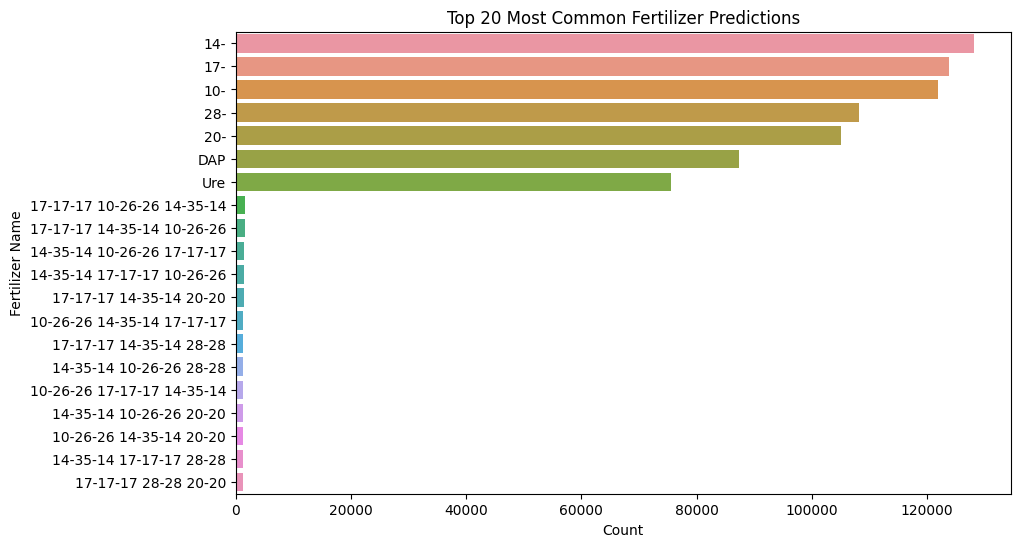

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load all ensemble outputs
methods = ['vote', 'weighted', 'consensus_fill', 'stacked', 'diverse']
dfs = {m: pd.read_csv(f'ensemble_{m}.csv').rename(columns={'Fertilizer Name': m}) for m in methods}

# Merge into one DataFrame
merged = dfs[methods[0]]
for m in methods[1:]:
    merged = merged.merge(dfs[m], on='id')

# 1. Correlation heatmap (convert predictions to categorical codes)
cat_df = merged.copy()
for m in methods:
    cat_df[m] = cat_df[m].astype('category').cat.codes

plt.figure(figsize=(8, 6))
sns.heatmap(cat_df[methods].corr(), annot=True, cmap='vlag')
plt.title('Correlation Between Ensemble Strategies')
plt.show()

# 2. Distribution of number of unique predictions per row
merged['unique_preds'] = merged[methods].apply(lambda row: len(set(row)), axis=1)

plt.figure(figsize=(8, 4))
sns.histplot(merged['unique_preds'], bins=range(1, 7), discrete=True)
plt.title('Unique Predictions per Row Across Ensembles')
plt.xlabel('Number of Unique Predictions')
plt.ylabel('Count')
plt.show()

# 3. Most common predictions
all_preds = pd.concat([merged[m] for m in methods])
top_preds = all_preds.value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_preds.values, y=top_preds.index)
plt.title('Top 20 Most Common Fertilizer Predictions')
plt.xlabel('Count')
plt.ylabel('Fertilizer Name')
plt.show()
